In [21]:
import os
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from wordcloud import WordCloud#词云包
import jieba.analyse as analyse

In [2]:
l1 = []
l2 = []
for i in range(len(glob.glob(r'./data/cap*.txt'))):
    try:
        t = ' '.join(pd.read_table(glob.glob(r'./data/cap*.txt')[i],encoding='gbk',header=None).dropna()[0].values.tolist())
        l1.append(t)
        l2.append(glob.glob(r'./data/cap*.txt')[i])
    except Exception as e:
        print(glob.glob(r'./data/cap*.txt')[i])

df = pd.DataFrame({'txt':l2,'content':l1})
df['chapter'] = df['txt'].apply(lambda x:x[10])

In [4]:
content_all = df['content'].values.tolist()

In [5]:
words = ' '.join(content_all)

# 分词

In [6]:
segment=[]
segs=jieba.lcut(words)
for seg in segs:
    if len(seg)>1 and seg!='\r\n':
        segment.append(seg)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\91-JR\AppData\Local\Temp\jieba.cache
Loading model cost 0.916 seconds.
Prefix dict has been built succesfully.


# 去停用词

In [7]:
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

# 统计词频

In [8]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
19352,资本,7739
15579,生产,7104
4570,价值,6784
7990,商品,5265
6536,劳动,5229


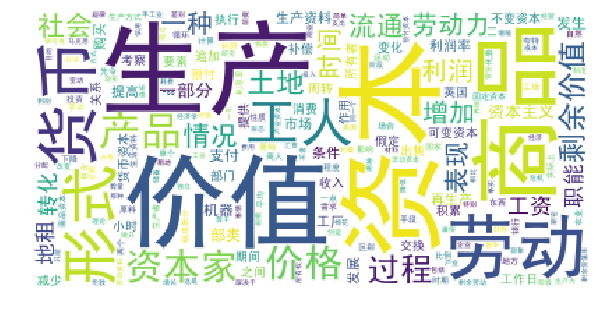

In [20]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
wordcloud=WordCloud(background_color="white",font_path='data/simhei.ttf',max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.axis("off")
plt.imshow(wordcloud)